# Survey 2: Facebook Profile Characteristics

In [14]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import unicodedata

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii
from collections import Counter
from collections import OrderedDict
from prettytable import PrettyTable

# Pre-Processing

In [15]:
# Create Bag of Words Numpy Array
df = pd.read_csv("S2_Data/s2_ratings_demographics.csv", delimiter=",")
df

,email,url,first_name,last_name,gender,race,ideology,wm_immigration,bm_immigration,wm_gender,wf_gender
0,lmzuniga@princeton.edu,https://www.facebook.com/leomatias.espinoza,Leonardo,Espinoza Zuniga,Male,Hispanic or Latino,4,NaN,2.0,6.0,NaN
1,aty@princeton.edu,https://www.facebook.com/alex.yablonski.7,Alexander,Yablonski,Male,White,6,NaN,2.0,NaN,2.0
2,jholeman@princeton.edu,https://www.facebook.com/jaredwholeman,Jared,Holeman,Male,Black or African American,3,NaN,2.0,NaN,3.0
3,celiab@princeton.edu,https://www.facebook.com/celia.buchband.1,Celia,Buchband,Female,White,2,NaN,3.0,1.0,NaN
4,foo@princeton.edu,https://www.facebook.com/favor.oribhabor,Favour,Oribhabor,Female,Black or African American,3,NaN,3.0,NaN,2.0
5,okusanya@princeton.edu,https://www.facebook.com/bayode.okusanya,Bayo,Okusanya,Male,Black or African American,4,NaN,3.0,NaN,6.0
6,amandae@princeton.edu,https://www.facebook.com/amanda.eisenhour.1,Amanda,Eisenhour,Female,White,1,NaN,3.0,NaN,3.0
7,polanish@princeton.edu,https://www.facebook.com/profile.php?id=100011...,Kevin,Polanish,Male,White,4,NaN,4.0,5.0,NaN
8,dgbarnes@princeton.edu,https://www.facebook.com/profile.php?id=100010...,Declan,Barnes,Male,Black or African American,4,NaN,4.0,4.0,NaN
9,junghaneul@gmail.com,https://www.facebook.com/skyjung2000,Haneul,Jung,Male,Asian / Pacific Islander,4,NaN,4.0,NaN,3.0


### Divide into separate lists

In [16]:
# Get lists from data
email = df['email']
url = df['url']
first_name = df['first_name']
last_name = df['last_name']
gender = df['gender']
race = df['race']
ideology = df['ideology']
wm_immigration = df['wm_immigration']
bm_immigration = df['bm_immigration']
wm_gender = df['wm_gender']
wf_gender = df['wf_gender']

In [24]:
# Get only Facebook ratings
wm_immigration_edited = wm_immigration.dropna().astype(int)
bm_immigration_edited = bm_immigration.dropna().astype(int)
wm_gender_edited = wm_gender.dropna().astype(int)
wf_gender_edited = wf_gender.dropna().astype(int)

1.4433756729740645

### Helper Functions

In [19]:
# Isolate demographics for ratings
def get_demographics(rating):
    indices = rating.index.values
    # initiate edited lists
    gender_edited = []
    race_edited = []
    ideology_edited = []
    # isolate each demographic
    for i in indices:
        gender_edited.append(gender[i])
        race_edited.append(race[i])
        ideology_edited.append(ideology[i])
    gender_series = pd.Series(gender_edited, index=indices)
    race_series = pd.Series(race_edited, index=indices)
    ideology_series = pd.Series(ideology_edited, index=indices)
    return gender_series, race_series, ideology_series

### Isolate demographics for each post

In [20]:
gender_wmi, race_wmi, ideology_wmi = get_demographics(wm_immigration_edited)
gender_bmi, race_bmi, ideology_bmi = get_demographics(bm_immigration_edited)
gender_wmg, race_wmg, ideology_wmg = get_demographics(wm_gender_edited)
gender_wfg, race_wfg, ideology_wfg = get_demographics(wf_gender_edited)

# Graphs

### Helper functions

In [21]:
# Return mean rounded to 4 decimals
def get_means(data):
    m = np.round(np.mean(data), decimals=4)
    if math.isnan(m):
        m = 0
    return m

# Return standard deviation rounded to 4 decimals
def get_stds(data):
    sd = np.round(np.std(data), decimals=4)
    if math.isnan(sd):
        sd = 0
    return sd

def get_xticks(x_labels):
    n = len(x_labels)
    xticks = []
    for i in range(n):
        xticks.append(i+0.2)
    return xticks

def get_table(demographic, data_means, data_sds):
    t = PrettyTable()
    field_names = ['stat']
    for k in demographic:
        field_names.append(k)
    t.field_names = field_names
    means_row = ['means']
    for i in data_means:
        means_row.append(i)
    sds_row = ['sds']
    for j in data_sds:
        sds_row.append(j)
    t.add_row(means_row)
    t.add_row(sds_row)
    return t
    
miu = unicodedata.lookup("GREEK SMALL LETTER MU")
sigma = unicodedata.lookup("GREEK SMALL LETTER SIGMA")

## Analyze by Post

In [22]:
def get_counts(data):
    final_counts = []
    counts = Counter(data)
    counts = OrderedDict(sorted(counts.items()))
    missing = []
    i = 1
    for key, value in counts.items():
        if i != key:
            missing.append(i)
            i = i + 1
        i = i + 1
    for j in missing:
        counts[j] = 0
    counts = OrderedDict(sorted(counts.items()))
    for key, value in counts.items():
        final_counts.append(value)
    return final_counts

def graph(data, post_title):
    counts = get_counts(data)
    bar_spacing = list(range(1, 8, 1))
    fig = plt.figure(figsize=(8,6))
    plt.bar(bar_spacing, counts, width=0.75)
    for j in range(7):
        plt.text(x=bar_spacing[j]-0.06, y=counts[j]+0.05, s=counts[j], fontsize=12)
    plt.xlabel('Rankings', fontsize=14)
    plt.ylabel('Frequencies', fontsize=14)
    plt.title('Rankings for %s' % post_title, fontsize=14)
    plt.savefig('Figures/%s.png' % post_title, overwrite=True)
    plt.show()

### Immigration

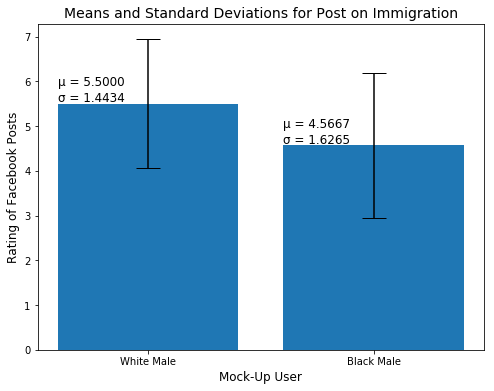

In [27]:
i_means = [get_means(wm_immigration_edited), get_means(bm_immigration_edited)]
i_stds = [get_stds(wm_immigration_edited), get_stds(bm_immigration_edited)]
i_poster = ['White Male', 'Black Male']
# Plot figure
fig = plt.figure(figsize=(8,6))
plt.bar(i_poster, i_means, yerr=i_stds, align='center', ecolor='black', capsize=12)
plt.ylabel('Rating of Facebook Posts', size = 12)
plt.xlabel('Mock-Up User', size = 12)
plt.title('Means and Standard Deviations for Post on Immigration', size = 14)
# Text on the top of each barplot
r = get_xticks(i_poster)
for i in range(len(r)):
    plt.text(x = r[i]-0.6, y = i_means[i]+0.4, s = ('%s = %.4f' % (miu, i_means[i])), size = 12)
    plt.text(x = r[i]-0.6, y = i_means[i]+0.05, s = ('%s = %.4f' % (sigma, i_stds[i])), size = 12)
plt.savefig('Figures/Immigration.png', overwrite=True)
    

In [ ]:
graph(wm_immigration_edited, "White Male Immigration")
graph(bm_immigration_edited, "Black Male Immigration")

### Gender

In [ ]:
g_means = [get_means(wm_gender_edited), get_means(wf_gender_edited)]
g_stds = [get_stds(wm_gender_edited), get_stds(wf_gender_edited)]
g_poster = ['White Male', 'White Female']
# Plot figure
fig = plt.figure(figsize=(8,6))
plt.bar(g_poster, g_means, yerr=g_stds, align='center', ecolor='black', capsize=12)
plt.ylabel('Rating of Facebook Posts', size = 12)
plt.xlabel('Mock-Up User', size = 12)
plt.title('Means and Standard Deviations for Post on Gender', size = 14)
# Text on the top of each barplot
r = get_xticks(g_poster)
for i in range(len(r)):
    plt.text(x = r[i]-0.6, y = g_means[i]+0.4, s = ('%s = %.4f' % (miu, g_means[i])), size = 12)
    plt.text(x = r[i]-0.6, y = g_means[i]+0.05, s = ('%s = %.4f' % (sigma, g_stds[i])), size = 12)
plt.savefig('Figures/Gender.png', overwrite=True)  

In [ ]:
graph(wm_gender_edited, "White Male Gender")
graph(wf_gender_edited, "White Female Gender")

## Analyze by Survey Participants' Gender

In [ ]:
def gender_analysis(data, target, post_name):
    indices = data.index.values
    ratings_m = []
    ratings_f = []
    ratings_n = []
    for i in range(len(indices)):
        if target.iloc[i] == 'Male':
            ratings_m.append(data.iloc[i])
        elif target.iloc[i] == 'Female':
            ratings_f.append(data.iloc[i])
        else:
            ratings_n.append(data.iloc[i])
    # Set x-axis
    genders = ['Male', 'Female', 'Nonbinary/agender']
    # Get rating means and standard deviations
    gender_means = [get_means(ratings_m), get_means(ratings_f), get_means(ratings_n)]
    gender_sds = [get_stds(ratings_m), get_stds(ratings_f), get_stds(ratings_n)]
    t = get_table(genders, gender_means, gender_sds)
    #t = Table([genders, gender_means, gender_sds], names=('%s Post Genders' % post_name, 'Means', 'Std Devs'))
    print(post_name)
    print(t)
    # Plot figure
    fig = plt.figure(figsize=(8,6))
    plt.bar(genders, gender_means, yerr=gender_sds, align='center', ecolor='black', capsize=12)
    plt.ylabel('Rating of Facebook Posts', size = 12)
    plt.xlabel('Genders', size = 12)
    plt.title('Means and Standard Deviations for %s Post by Gender' % post_name, size = 14)
    # Text on the top of each barplot
    r = get_xticks(genders)
    for i in range(len(r)):
        plt.text(x = r[i]-0.6, y = gender_means[i]+0.4, s = ('%s = %.4f' % (miu, gender_means[i])), size = 12)
        plt.text(x = r[i]-0.6, y = gender_means[i]+0.05, s = ('%s = %.4f' % (sigma, gender_sds[i])), size = 12)
    plt.savefig('Figures/%s_by_gender.png' % post_name, overwrite=True)
    
gender_analysis(wm_immigration_edited, gender_wmi, 'White Male Immigration')
gender_analysis(bm_immigration_edited, gender_bmi, 'Black Male Immigration')
gender_analysis(wm_gender_edited, gender_wmg, 'White Male Gender')
gender_analysis(wf_gender_edited, gender_wfg, 'White Female Gender')

## Analyze by Survey Participants' Race

In [ ]:
  def race_analysis(data, target, post_name):
    indices = data.index.values
    ratings_white = []
    ratings_minority = []
    for i in range(len(indices)):
        if target.iloc[i] == 'White':
            ratings_white.append(data.iloc[i])
        else:
            ratings_minority.append(data.iloc[i])
    # Set x-axis
    races = ['White', 'Minority']
    # Get rating means and standard deviations
    race_means = [get_means(ratings_white), get_means(ratings_minority)]
    race_sds = [get_stds(ratings_white), get_stds(ratings_minority)]
    t = get_table(races, race_means, race_sds)
    #t = PrettyTable([races, race_means, race_sds], names=('%s Post Races' % post_name, 'Means', 'Std Devs'))
    print(post_name)
    print(t)
    # Plot figure
    fig = plt.figure(figsize=(8,6))
    plt.bar(races, race_means, yerr=race_sds, align='center', ecolor='black', capsize=12)
    plt.ylabel('Rating of Facebook Posts', size=12)
    plt.xlabel('Races', size=12)
    plt.title('Means and Standard Deviations for %s Post by Race' % post_name, size=12)
    # Text on the top of each barplot
    r = get_xticks(races)
    for i in range(len(r)):
        plt.text(x = r[i]-0.6, y = race_means[i]+0.4, s = ('%s = %.4f' % (miu, race_means[i])), size=12)
        plt.text(x = r[i]-0.6, y = race_means[i]+0.05, s = ('%s = %.4f' % (sigma, race_sds[i])), size=12)
    plt.savefig('Figures/%s_by_race.png' % post_name, overwrite=True)
    
race_analysis(wm_immigration_edited, race_wmi, 'White Male Immigration')
race_analysis(bm_immigration_edited, race_bmi, 'Black Male Immigration')
race_analysis(wm_gender_edited, race_wmg, 'White Male Gender')
race_analysis(wf_gender_edited, race_wfg, 'White Female Gender')

## Analyze by Survey Participants' Ideology

In [ ]:
def ideology_analysis(data, target, post_name):
    indices = data.index.values
    ratings_1 = []
    ratings_2 = []
    ratings_3 = []
    ratings_4 = []
    ratings_5 = []
    ratings_6 = []
    ratings_7 = []   
    for i in range(len(indices)):
        if target.iloc[i] == 1:
            ratings_1.append(data.iloc[i])
        elif target.iloc[i] == 2:
            ratings_2.append(data.iloc[i])
        elif target.iloc[i] == 3:
            ratings_3.append(data.iloc[i])
        elif target.iloc[i] == 4:
            ratings_4.append(data.iloc[i])
        elif target.iloc[i] == 5:
            ratings_5.append(data.iloc[i])
        elif target.iloc[i] == 6:
            ratings_6.append(data.iloc[i])
        else:
            ratings_7.append(data.iloc[i])
    # Set x-axis
    ideologies = list(range(1, 8, 1))
    # Get rating means and standard deviations
    ideology_means = [get_means(ratings_1), get_means(ratings_2), get_means(ratings_3), get_means(ratings_4), get_means(ratings_5), get_means(ratings_6), get_means(ratings_7)]
    ideology_sds = [get_stds(ratings_1), get_stds(ratings_2), get_stds(ratings_3), get_stds(ratings_4), get_stds(ratings_5), get_stds(ratings_6), get_stds(ratings_7)]
    t = get_table(ideologies, ideology_means, ideology_sds)
    #t = Table([ideologies, ideology_means, ideology_sds], names=('%s Post Ideologies' % post_name, 'Means', 'Std Devs'))
    print(post_name)
    print(t)
    # Plot figure
    fig = plt.figure(figsize=(11,5))
    plt.bar(ideologies, ideology_means, yerr=ideology_sds, align='center', ecolor='black', capsize=12)
    plt.ylabel('Rating of Facebook Posts', size=12)
    plt.xlabel('Ideology Leaning (1 is extremely liberal, 7 is extremely conservative)', size=12)
    plt.title('Means and Standard Deviations for %s Post by Ideology' % post_name, size=12)
    # Text on the top of each barplot
    for i in range(len(ideologies)):
        plt.text(x = ideologies[i]-0.4, y = ideology_means[i]+0.4, s = ('%s = %.4f' % (miu, ideology_means[i])), size=11)
        plt.text(x = ideologies[i]-0.4, y = ideology_means[i]+0.05, s = ('%s = %.4f' % (sigma, ideology_sds[i])), size=11)
    plt.savefig('Figures/%s_by_ideology.png' % post_name, overwrite=True)
    
ideology_analysis(wm_immigration_edited, ideology_wmi, 'White Male Immigration')
ideology_analysis(bm_immigration_edited, ideology_bmi, 'Black Male Immigration')
ideology_analysis(wm_gender_edited, ideology_wmg, 'White Male Gender')
ideology_analysis(wf_gender_edited, ideology_wfg, 'White Female Gender')